In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv(os.getcwd()+'/immunizable_diseases_california.csv')
# data['county'].astype('category')
# data['disease'].astype('category')


In [4]:

year_count_array = [np.array(data['year']),np.array(data['count'])]
county_array = data['county']
total_per_year = {}
total_per_county = {}

# Get total cases per year
i = 0
while i < len(data['count']):
    year = year_count_array[0][i]
    count = year_count_array[1][i]
    county = county_array[i]
    
    if year in total_per_year:
        oldcount = total_per_year[year]
        newcount = oldcount + count
        total_per_year[year] = newcount
        
    if(year not in total_per_year):
        total_per_year[year] = count
   
    if county in total_per_county:
        oldcount = total_per_county[county]
        newcount = oldcount + count
        total_per_county[county] = newcount
   
    if (county not in total_per_county):
        total_per_county[county] = count
        
    i += 1

[Text(0, 0.5, 'Counties in California'),
 Text(0.5, 0, 'No. of Cases'),
 Text(0.5, 1.0, 'Total number of immunizable disease cases by county (2001-2018)')]

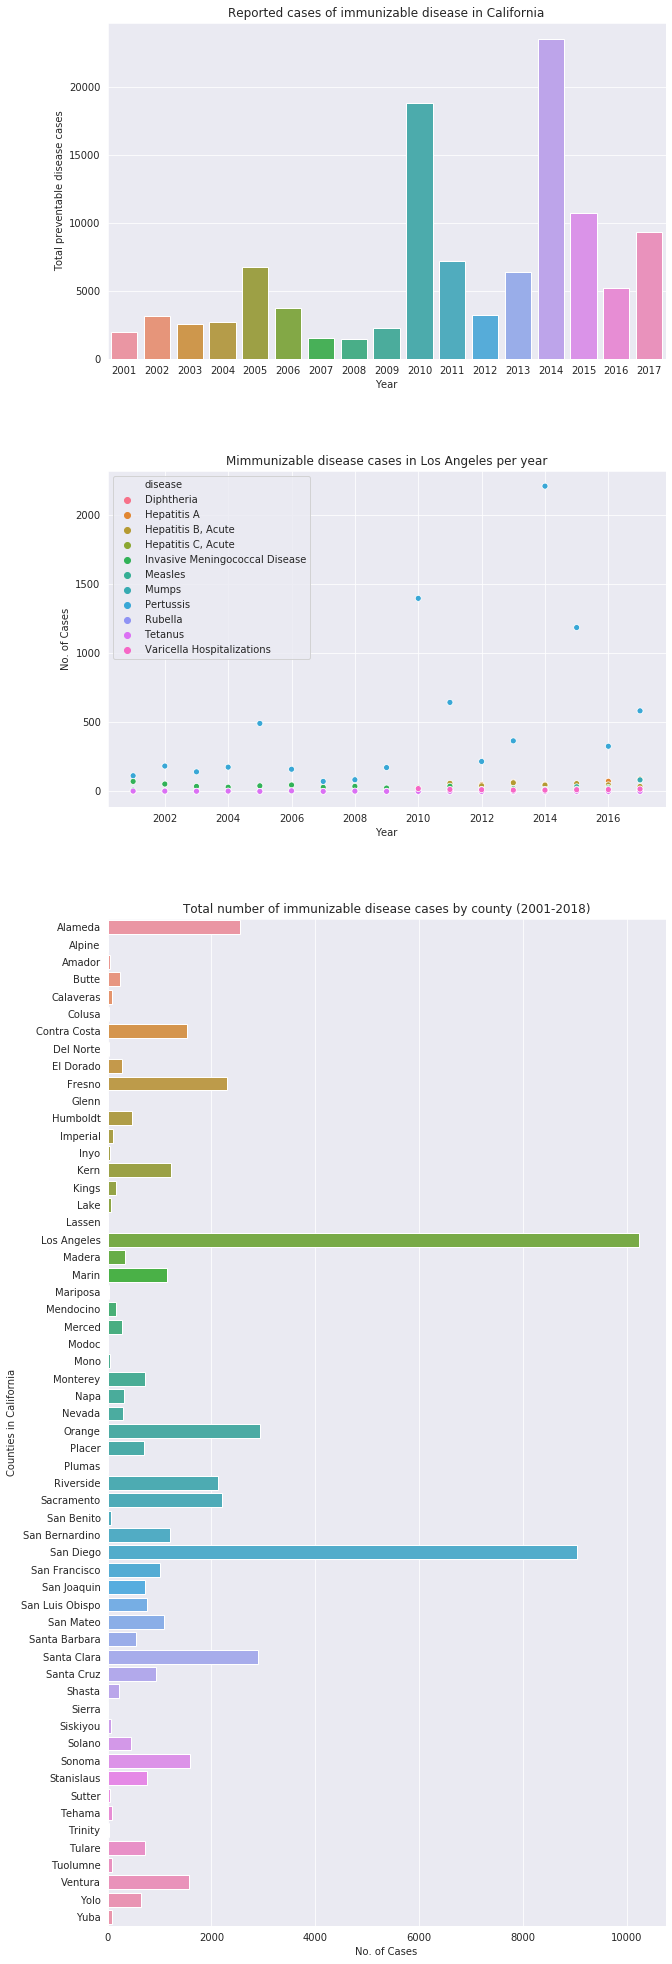

In [16]:

fig, axes = plt.subplots(3,1
                         , figsize=(10,35)
                         , gridspec_kw={'height_ratios': [1, 1, 3]})
sns.set_style('darkgrid')

# make data frame
total = pd.DataFrame.from_dict(total_per_year, orient='index', columns=['count'], dtype=np.float32)
total['year'] = data['year'].unique()
county_total = pd.DataFrame.from_dict(total_per_county, orient='index', columns=['count'], dtype=np.float32)
county_total['county'] = data['county'].unique()

# Plot 0
years = sns.barplot(data=total, x='year', y='count' , ax=axes[0])
years.set(xlabel='Year'
          , ylabel='Total preventable disease cases'
          , title='Reported cases of immunizable disease in California')

# Plot 1
diseases = sns.scatterplot(data=data[(data['county'] == 'Los Angeles')]
            , x='year'
            , y='count'
            , hue='disease'
            , ax= axes[1])

diseases.set(xlabel='Year'
             , ylabel='No. of Cases'
             , title='Mimmunizable disease cases in Los Angeles per year'
            )
# Plot 2
counties = sns.barplot(data=county_total[(county_total['county'] != 'California')]
                , x='count'
                , y='county'
                , ax= axes[2]
                )
counties.set(xlabel='No. of Cases'
            , ylabel='Counties in California'
            , title='Total number of immunizable disease cases by county (2001-2018)')